In [2]:
import pandas as pd

# Load the latest CSV file
file_path = 'FinalOutput.csv'  # Replace with the actual path to the CSV file
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(data.head())

# Display basic information about the dataframe
print(data.info())

# Display summary statistics for the numerical columns
print(data.describe())


             channel_id                              channel_link  \
0   @answeredthatforyou   https://youtube.com/@answeredthatforyou   
1        @nickandcarrie        https://youtube.com/@nickandcarrie   
2  @4nonblondesofficial  https://youtube.com/@4nonblondesofficial   
3       @jasminandjames       https://youtube.com/@jasminandjames   
4          @mavigadgets          https://youtube.com/@mavigadgets   

            channel_name   channel_type country country_rank    created_date  \
0  Answered That For You  entertainment      US        729th   Jan 4th, 2023   
1          NickandCarrie         people      AU         23rd   Jul 2nd, 2019   
2          4 Non Blondes            NaN      US        960th   Feb 2nd, 2023   
3       Jasmin and James  entertainment      AU        133rd  Sep 12th, 2021   
4             MaviGadget  entertainment      US         66th  Nov 19th, 2017   

  daily_subs_average daily_views_average estimated_monthly_income  ...  \
0             +8.33K          

In [7]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'FinalOutput.csv'  # Replace with the actual path
data = pd.read_csv(file_path)

# Handle missing values
data.fillna('N/A', inplace=True)

# Function to clean income data and convert to numerical values
def clean_income(income_str):
    if income_str == 'N/A' or pd.isna(income_str):
        return np.nan
    income_str = str(income_str).replace('€', '').replace('$', '').replace('K', 'e3').replace('M', 'e6').replace('B', 'e9').replace(' ', '').replace(',', '')
    try:
        # Handle ranges by taking the average
        if '-' in income_str:
            low, high = income_str.split('-')
            return (float(eval(low.strip())) + float(eval(high.strip()))) / 2
        else:
            return float(eval(income_str))
    except:
        return np.nan

# Clean and convert 'estimated_monthly_income' and 'yearly_income'
data['estimated_monthly_income'] = data['estimated_monthly_income'].apply(clean_income)
data['yearly_income'] = data['yearly_income'].apply(clean_income)

# Convert 'subscribers', 'views_last_30_days', and 'daily_subs_average' to numeric values
def clean_numeric(value):
    if value == 'N/A' or pd.isna(value):
        return np.nan
    value = str(value).replace('K', 'e3').replace('M', 'e6').replace('B', 'e9').replace(',', '').replace('+', '')
    try:
        return float(eval(value))
    except:
        return np.nan

data['subscribers'] = data['subscribers'].apply(clean_numeric)
data['views_last_30_days'] = data['views_last_30_days'].apply(clean_numeric)
data['daily_subs_average'] = data['daily_subs_average'].apply(clean_numeric)
data['daily_views_average'] = data['daily_views_average'].apply(clean_numeric)

# Convert 'uploads' and 'views' to numeric types if necessary
data['uploads'] = pd.to_numeric(data['uploads'], errors='coerce')
data['views'] = pd.to_numeric(data['views'], errors='coerce')

# Drop the column 'Unnamed: 21' as it is not used
data.drop(columns=['Unnamed: 21'], inplace=True)

# Verify the cleaned data
print(data.head())
print(data.info())
print(data.describe())

# Save the cleaned data to a new CSV file
cleaned_file_path = 'cleaned_output.csv'  # Replace with the desired path for the cleaned data
data.to_csv(cleaned_file_path, index=False)


             channel_id                              channel_link  \
0   @answeredthatforyou   https://youtube.com/@answeredthatforyou   
1        @nickandcarrie        https://youtube.com/@nickandcarrie   
2  @4nonblondesofficial  https://youtube.com/@4nonblondesofficial   
3       @jasminandjames       https://youtube.com/@jasminandjames   
4          @mavigadgets          https://youtube.com/@mavigadgets   

            channel_name   channel_type country country_rank    created_date  \
0  Answered That For You  entertainment      US        729th   Jan 4th, 2023   
1          NickandCarrie         people      AU         23rd   Jul 2nd, 2019   
2          4 Non Blondes            N/A      US        960th   Feb 2nd, 2023   
3       Jasmin and James  entertainment      AU        133rd  Sep 12th, 2021   
4             MaviGadget  entertainment      US         66th  Nov 19th, 2017   

   daily_subs_average  daily_views_average  estimated_monthly_income  ...  \
0              8330.0      

C:\Users\Reza\AppData\Local\Temp\ipykernel_23360\69602278.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N/A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.fillna('N/A', inplace=True)


In [9]:
# Identify outliers using z-score
from scipy import stats

def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs(stats.zscore(data))
    return np.where(z_scores > threshold)[0]

# Handle zero values
def handle_zero_values(data):
    # Replace zero values with NaN
    data[data == 0] = np.nan
    # Impute NaN values
    # For example, replace NaN values with the median
    median = np.nanmedian(data)
    data.fillna(median, inplace=True)
    return data

# Before outlier detection and handling
print("Before Outlier Detection and Handling:")
print("=====================================")
print("Monthly Income Statistics:")
print(data['estimated_monthly_income'].describe())
print("\nYearly Income Statistics:")
print(data['yearly_income'].describe())

# Apply outlier detection and handling for 'estimated_monthly_income'
outliers_monthly_income = detect_outliers_zscore(data['estimated_monthly_income'])
data['estimated_monthly_income'] = handle_zero_values(data['estimated_monthly_income'])

# Apply outlier detection and handling for 'yearly_income'
outliers_yearly_income = detect_outliers_zscore(data['yearly_income'])
data['yearly_income'] = handle_zero_values(data['yearly_income'])

# After outlier detection and handling
print("\nAfter Outlier Detection and Handling:")
print("=====================================")
print("Monthly Income Statistics:")
print(data['estimated_monthly_income'].describe())
print("\nYearly Income Statistics:")
print(data['yearly_income'].describe())




# 
# data['subscribers_zscore'] = zscore(data['subscribers'])
# outliers = data[(data['subscribers_zscore'] > 3) | (data['subscribers_zscore'] < -3)]
# 
# print("Outliers:")
# print(outliers[['channel_name', 'created_date', 'subscribers']])
# 
# # Outlier Handling (Replace with NaN)
# data.loc[(data['subscribers_zscore'] > 3) | (data['subscribers_zscore'] < -3), 'subscribers'] = np.nan
# 
# # Print the modified dataset
# print(data.head())


Before Outlier Detection and Handling:
Monthly Income Statistics:
count    2.343000e+03
mean     2.301230e+05
std      4.575564e+05
min      1.300000e-01
25%      1.307500e+04
50%      7.020000e+04
75%      2.177500e+05
max      6.426800e+06
Name: estimated_monthly_income, dtype: float64

Yearly Income Statistics:
count    2.343000e+03
mean     2.760782e+06
std      5.489822e+06
min      1.590000e+00
25%      1.572500e+05
50%      8.495500e+05
75%      2.603725e+06
max      7.685000e+07
Name: yearly_income, dtype: float64

After Outlier Detection and Handling:
Monthly Income Statistics:
count    2.343000e+03
mean     2.301230e+05
std      4.575564e+05
min      1.300000e-01
25%      1.307500e+04
50%      7.020000e+04
75%      2.177500e+05
max      6.426800e+06
Name: estimated_monthly_income, dtype: float64

Yearly Income Statistics:
count    2.343000e+03
mean     2.760782e+06
std      5.489822e+06
min      1.590000e+00
25%      1.572500e+05
50%      8.495500e+05
75%      2.603725e+06
ma

C:\Users\Reza\AppData\Local\Temp\ipykernel_23360\2927818262.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data == 0] = np.nan
C:\Users\Reza\AppData\Local\Temp\ipykernel_23360\2927818262.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data == 0] = np.nan


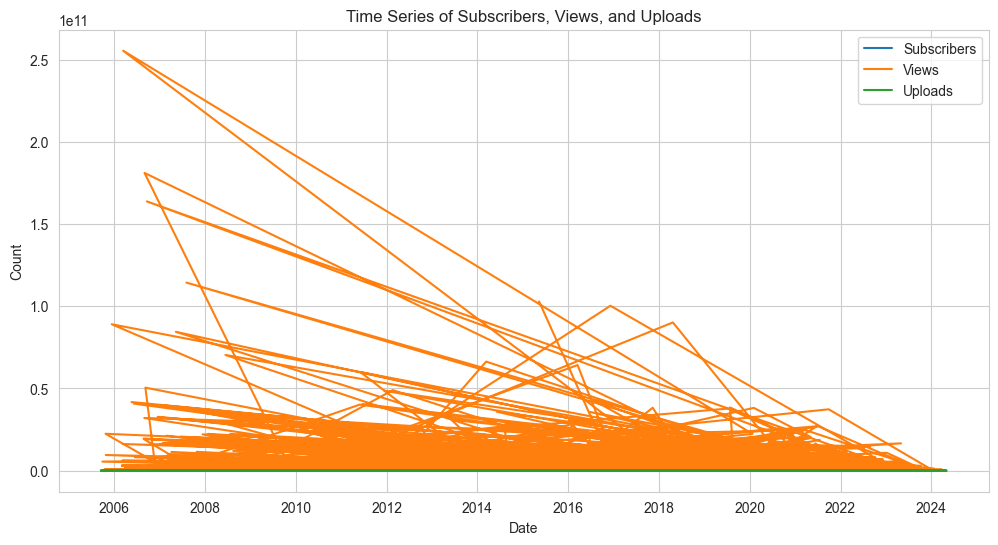

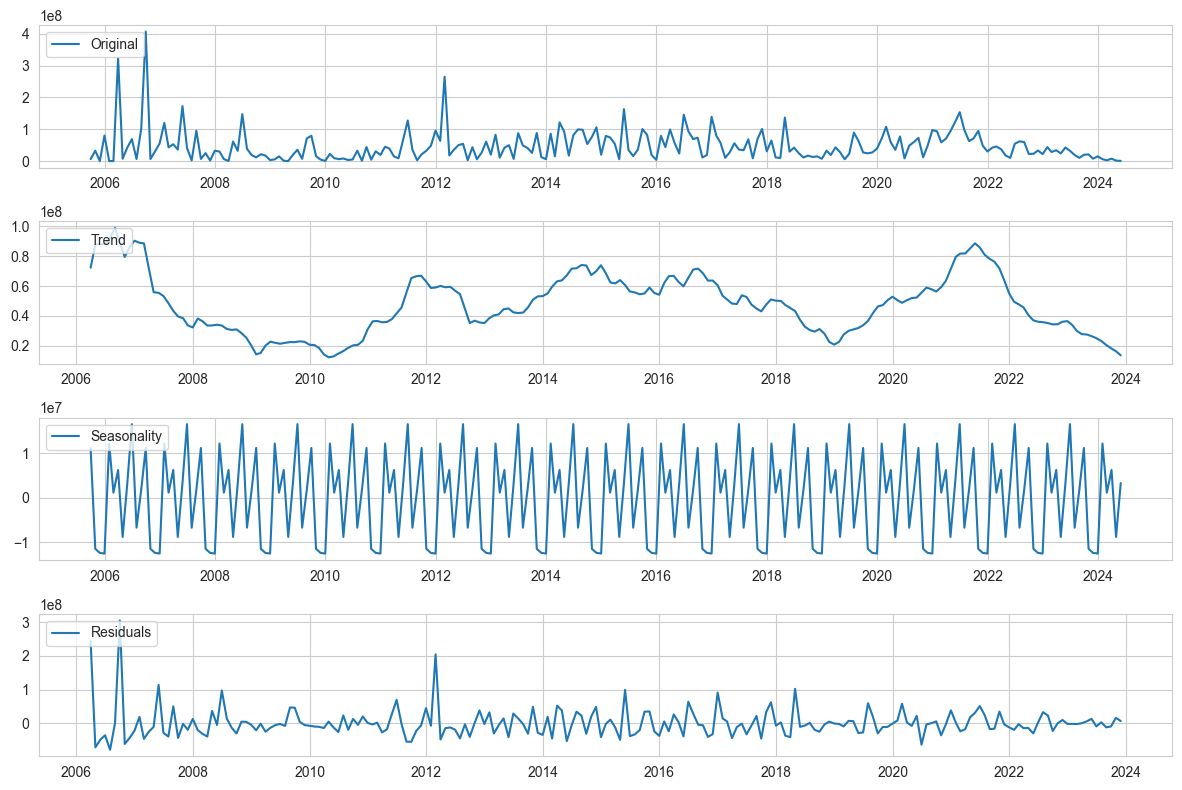

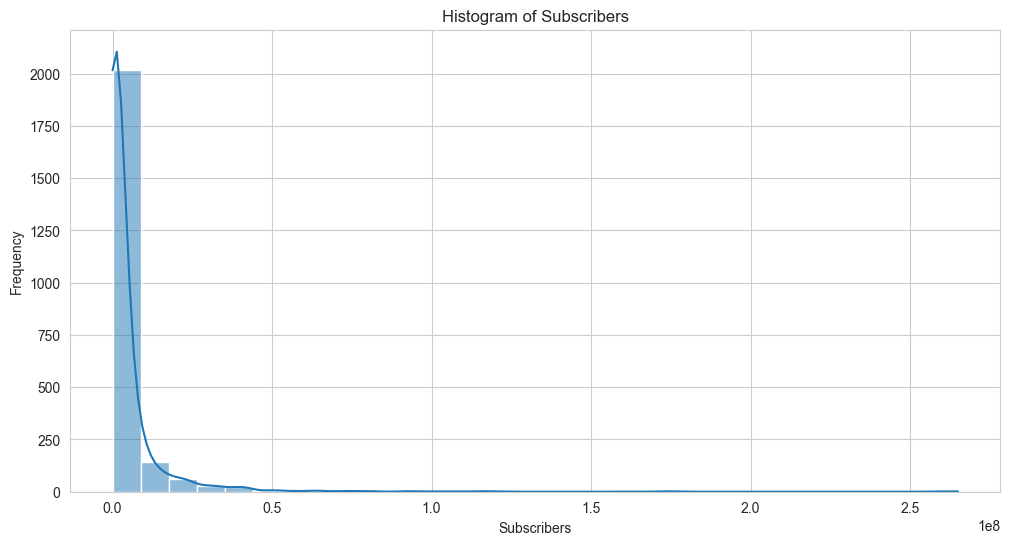

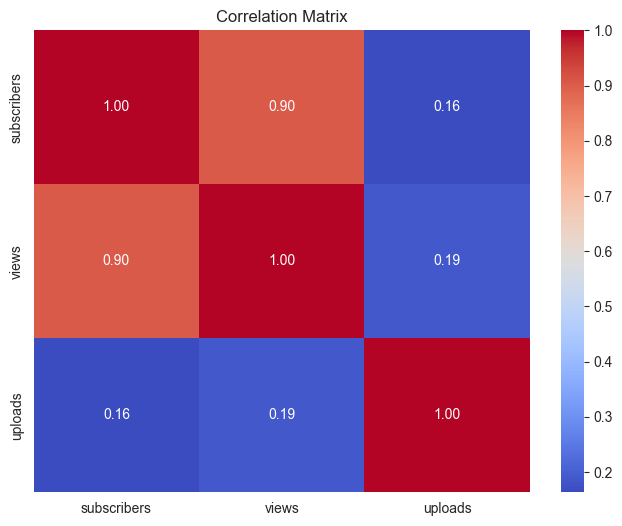

C:\Users\Reza\AppData\Local\Temp\ipykernel_23360\273693941.py:75: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  growth_rates = data[['subscribers', 'views']].pct_change()


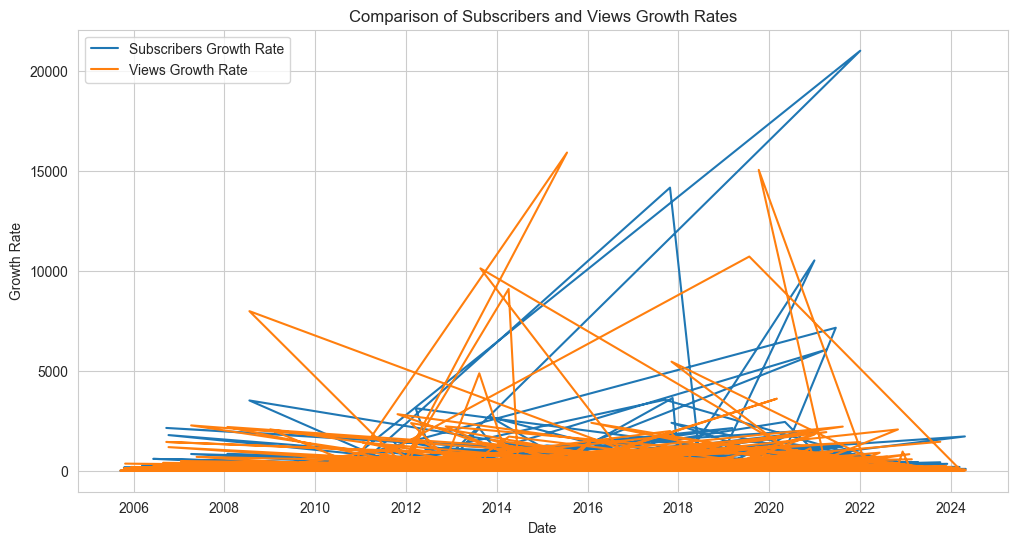

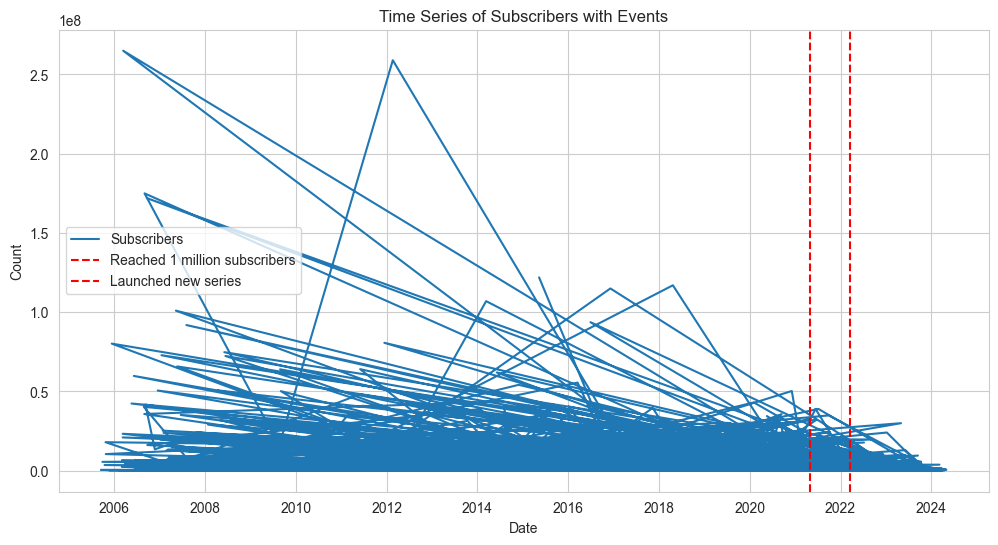

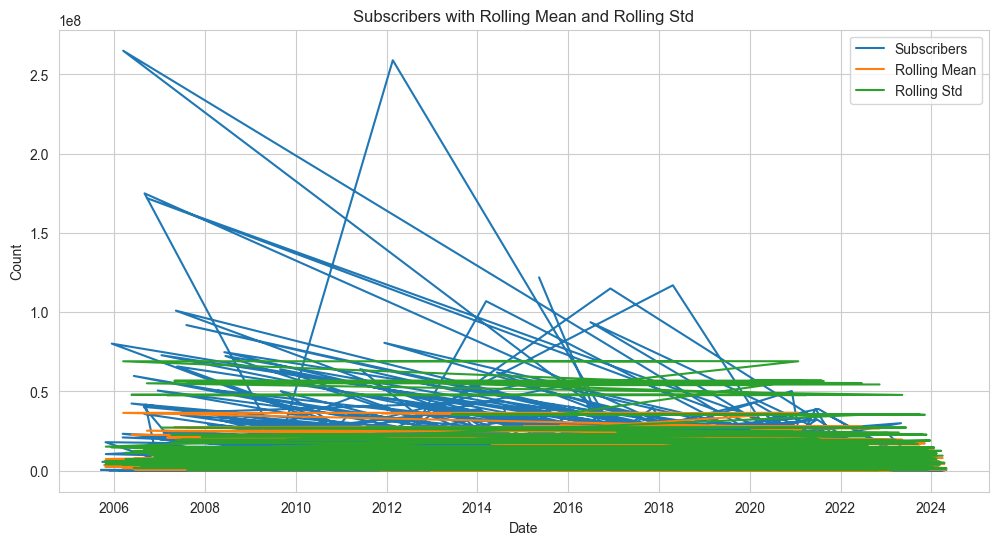

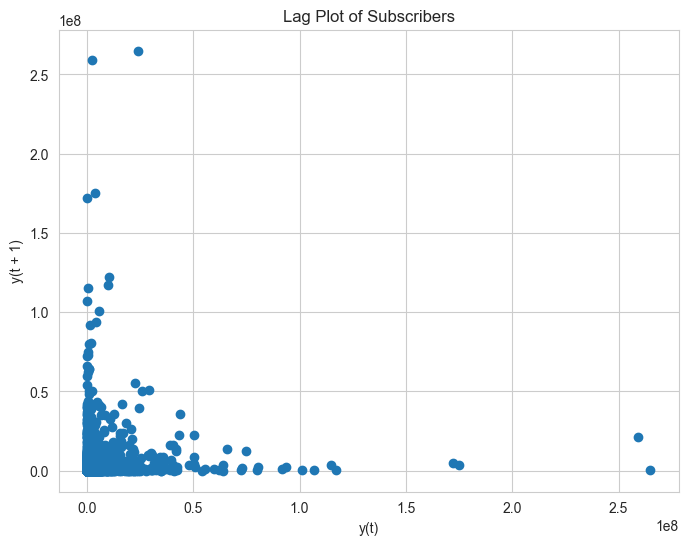

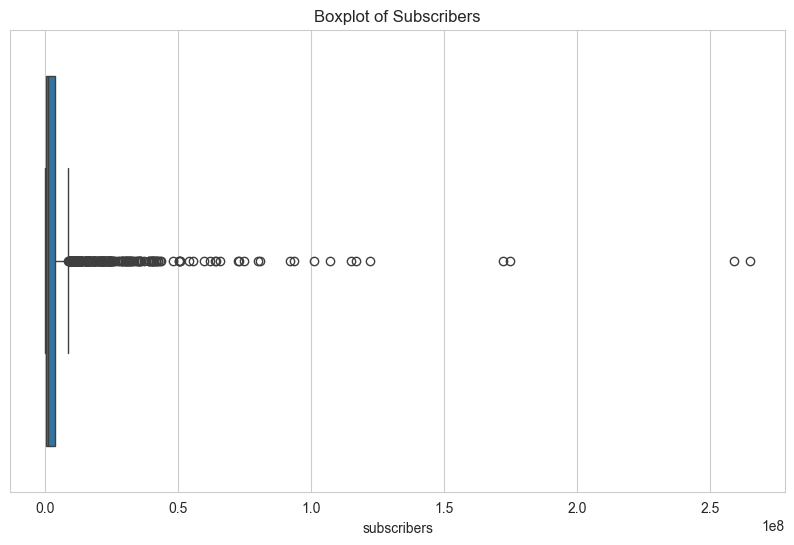

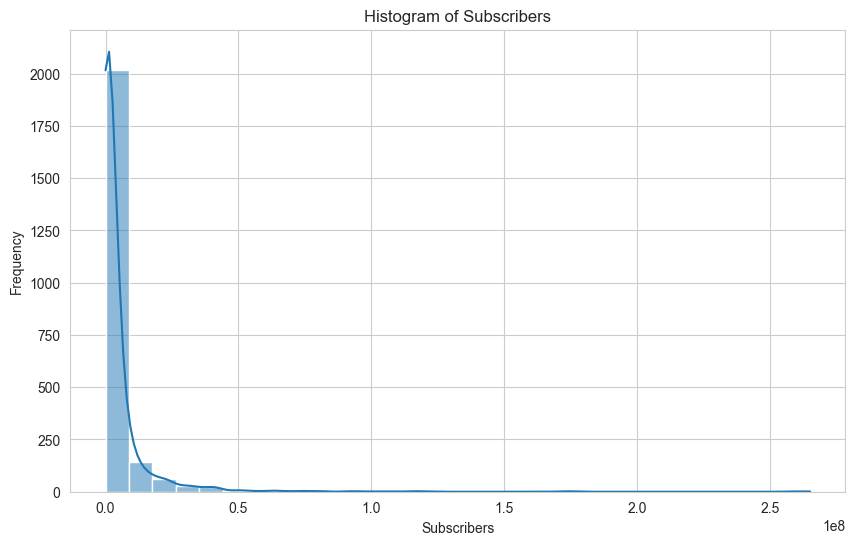

Outliers detected using IQR method:
Empty DataFrame
Columns: [channel_name, created_date, subscribers]
Index: []

Modified dataset after outlier handling:
  created_date            channel_id  \
0   2023-01-04   @answeredthatforyou   
1   2019-07-02        @nickandcarrie   
2   2023-02-02  @4nonblondesofficial   
3   2021-09-12       @jasminandjames   
4   2017-11-19          @mavigadgets   

                               channel_link           channel_name  \
0   https://youtube.com/@answeredthatforyou  Answered That For You   
1        https://youtube.com/@nickandcarrie          NickandCarrie   
2  https://youtube.com/@4nonblondesofficial          4 Non Blondes   
3       https://youtube.com/@jasminandjames       Jasmin and James   
4          https://youtube.com/@mavigadgets             MaviGadget   

    channel_type country country_rank  daily_subs_average  \
0  entertainment      US        729th              8330.0   
1         people      AU         23rd             10000.0   


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the cleaned data
cleaned_file_path = 'cleaned_output.csv'
data = pd.read_csv(cleaned_file_path)

# Remove suffixes from the 'created_date' strings
data['created_date'] = data['created_date'].str.replace(r'(\d+)(th|nd|st|rd)', r'\1', regex=True)

# Convert 'created_date' to datetime with corrected format
data['created_date'] = pd.to_datetime(data['created_date'], format='%b %d, %Y')

# Time Series Plots
plt.figure(figsize=(12, 6))
plt.plot(data['created_date'], data['subscribers'], label='Subscribers')
plt.plot(data['created_date'], data['views'], label='Views')
plt.plot(data['created_date'], data['uploads'], label='Uploads')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Time Series of Subscribers, Views, and Uploads')
plt.legend()
plt.show()

# Seasonal Decomposition
data.set_index('created_date', inplace=True)  # Set 'created_date' as the index
monthly_data = data.resample('ME').sum()  # Resample the data by month and sum the values
decomposition = seasonal_decompose(monthly_data['subscribers'], model='additive', period=12)  # Perform seasonal decomposition
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(monthly_data['subscribers'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(monthly_data.index, trend[:len(monthly_data)], label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(monthly_data.index, seasonal[:len(monthly_data)], label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(monthly_data.index, residual[:len(monthly_data)], label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Daily, Weekly, and Monthly Averages
daily_avg = data.select_dtypes(include=np.number).groupby(data.index.date).mean()
weekly_avg = data.select_dtypes(include=np.number).resample('W-Mon').mean()
monthly_avg = data.select_dtypes(include=np.number).resample('ME').mean()

# Histograms and Density Plots
plt.figure(figsize=(12, 6))
sns.histplot(data['subscribers'], bins=30, kde=True)
plt.xlabel('Subscribers')
plt.ylabel('Frequency')
plt.title('Histogram of Subscribers')
plt.show()

# Correlation Analysis
correlation_matrix = data[['subscribers', 'views', 'uploads']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

data.reset_index(inplace=True)  # Reset the index to make 'created_date' a column again
# Metric Comparison
growth_rates = data[['subscribers', 'views']].pct_change()
plt.figure(figsize=(12, 6))
plt.plot(data['created_date'], growth_rates['subscribers'], label='Subscribers Growth Rate')
plt.plot(data['created_date'], growth_rates['views'], label='Views Growth Rate')
plt.xlabel('Date')
plt.ylabel('Growth Rate')
plt.title('Comparison of Subscribers and Views Growth Rates')
plt.legend()
plt.show()

# Event Detection (Manual)
plt.figure(figsize=(12, 6))
plt.plot(data['created_date'], data['subscribers'], label='Subscribers')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Time Series of Subscribers with Events')
plt.legend()

# Define significant events or milestones
significant_events = [
    ('2021-05-01', 'Reached 1 million subscribers'),
    ('2022-03-15', 'Launched new series'),
    # Add more events as needed
]

# Plot events on the graph
for date, label in significant_events:
    plt.axvline(x=pd.Timestamp(date), color='r', linestyle='--', label=label)
plt.legend()
plt.show()

# Rolling Statistics
rolling_mean = data['subscribers'].rolling(window=30).mean()
rolling_std = data['subscribers'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(data['created_date'], data['subscribers'], label='Subscribers')
plt.plot(data['created_date'], rolling_mean, label='Rolling Mean')
plt.plot(data['created_date'], rolling_std, label='Rolling Std')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Subscribers with Rolling Mean and Rolling Std')
plt.legend()
plt.show()

# Lag Plots
from pandas.plotting import lag_plot

plt.figure(figsize=(8, 6))
lag_plot(data['subscribers'])
plt.title('Lag Plot of Subscribers')
plt.show()

# # Outlier Detection (Z-Score)
# from scipy.stats import zscore
# 
# data['subscribers_zscore'] = zscore(data['subscribers'])
# outliers = data[(data['subscribers_zscore'] > 3) | (data['subscribers_zscore'] < -3)]
# 
# print("Outliers:")
# print(outliers[['channel_name', 'created_date', 'subscribers']])
# 
# # Outlier Handling (Replace with NaN)
# data.loc[(data['subscribers_zscore'] > 3) | (data['subscribers_zscore'] < -3), 'subscribers'] = np.nan
# 
# # Print the modified dataset
# print(data.head())
# Outlier Detection using IQR method
def detect_outliers_iqr(series):
    Q1 = np.percentile(series, 25)
    Q3 = np.percentile(series, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (series < lower_bound) | (series > upper_bound)

# Apply outlier detection to 'subscribers' column
outliers_iqr = detect_outliers_iqr(data['subscribers'])

# Visual Inspection of Data Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['subscribers'])
plt.title('Boxplot of Subscribers')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['subscribers'], bins=30, kde=True)
plt.xlabel('Subscribers')
plt.ylabel('Frequency')
plt.title('Histogram of Subscribers')
plt.show()

# Print outliers detected using IQR method
print("Outliers detected using IQR method:")
print(data[outliers_iqr][['channel_name', 'created_date', 'subscribers']])

# Outlier Handling (Replace with NaN)
data.loc[outliers_iqr, 'subscribers'] = np.nan

# Print the modified dataset
print("\nModified dataset after outlier handling:")
print(data.head())
